In [17]:
import pandas as pd 
import  numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

In [7]:
banque= "C:/Users/ASUS ROG Zephyrus S/Desktop/Downloads/Banque.csv "

In [42]:
df = pd.read_csv(banque, sep=';', encoding='latin-1')

In [32]:
df

,ID,Age,Exp,RMM,F,DM,Educ,CEL,PP
0,1,25,1,49,4,1600,1,Non,Non
1,2,45,19,34,3,1500,1,Non,Non
2,3,39,15,11,1,1000,1,Non,Non
3,4,35,9,100,1,2700,2,Non,Non
4,5,35,8,45,4,1000,2,Non,Non
...,...,...,...,...,...,...,...,...,...
4889,4996,29,3,40,1,1900,3,Non,Non
4890,4997,30,4,15,4,400,1,Non,Non
4891,4998,63,39,24,2,300,3,Non,Non
4892,4999,65,40,49,3,500,2,Non,Non


print("Colonnes actuelles :", df.columns)

In [5]:
descriptive_stats = df.describe()

In [6]:
print(descriptive_stats)

                ID          Age          Exp          RMM            F  \
count  4894.000000  4894.000000  4894.000000  4894.000000  4894.000000   
mean   2499.444013    45.333265    20.088680    73.684716     2.405394   
std    1445.437454    11.474275    11.475238    46.045208     1.149174   
min       1.000000    23.000000    -3.000000     8.000000     1.000000   
25%    1242.250000    35.000000    10.000000    39.000000     1.000000   
50%    2501.500000    45.000000    20.000000    63.000000     2.000000   
75%    3750.750000    55.000000    30.000000    98.000000     3.000000   
max    5000.000000    67.000000    43.000000   224.000000     4.000000   

                 DM         Educ  
count   4894.000000  4894.000000  
mean    1979.912137     1.885574  
std     1742.801543     0.839199  
min      100.000000     1.000000  
25%      700.000000     1.000000  
50%     1600.000000     2.000000  
75%     2600.000000     3.000000  
max    10000.000000     3.000000  


In [7]:
from scipy.stats import fisher_exact

In [8]:
df_result=df.groupby("PP")
df_result.describe()

ID                                                                 \
      count        mean          std   min     25%     50%     75%     max   
PP                                                                           
Non  4415.0  2511.00521  1450.487365   1.0  1252.5  2519.0  3768.5  5000.0   
Oui   479.0  2392.88309  1394.992023  10.0  1166.0  2346.0  3568.0  4981.0   

        Age             ...      DM             Educ                           \
      count       mean  ...     75%      max   count      mean       std  min   
PP                      ...                                                     
Non  4415.0  45.359003  ...  2300.0   8800.0  4415.0  1.847792  0.839352  1.0   
Oui   479.0  45.096033  ...  5365.0  10000.0   479.0  2.233820  0.754085  1.0   

                         
     25%  50%  75%  max  
PP                       
Non  1.0  2.0  3.0  3.0  
Oui  2.0  2.0  3.0  3.0  

[2 rows x 56 columns]

In [7]:
df['PP'].describe()

count     4894
unique       2
top        Non
freq      4415
Name: PP, dtype: object

In [11]:
df_pp=df.groupby("PP")
df_pp

In [28]:
df['PP'].value_counts()

PP
Non    4415
Oui     479
Name: count, dtype: int64

In [32]:
modalite_counts = df['PP'].value_counts()

# Calculer les pourcentages de chaque modalité
pourcentages = (modalite_counts / len(df['PP'])) * 100

# Afficher les pourcentages exacts de chaque modalité
print("Pourcentages de chaque modalité de la variable PP:")
print(pourcentages)

Pourcentages de chaque modalité de la variable PP:
PP
Non    90.212505
Oui     9.787495
Name: count, dtype: float64


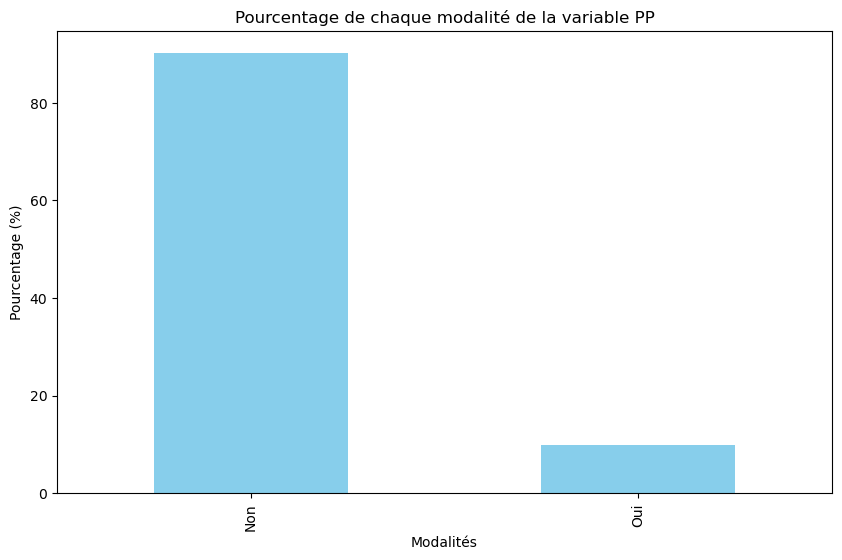

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que vous avez déjà un DataFrame df avec une colonne 'PP'
# Utilisez value_counts() pour compter le nombre de chaque modalité
modalite_counts = df['PP'].value_counts()

# Calculer les pourcentages de chaque modalité
pourcentages = (modalite_counts / len(df['PP'])) * 100

# Afficher un diagramme à barres pour visualiser les pourcentages de modalités
plt.figure(figsize=(10, 6))
pourcentages.plot(kind='bar', color='skyblue')
plt.xlabel('Modalités')
plt.ylabel('Pourcentage (%)')
plt.title('Pourcentage de chaque modalité de la variable PP')
plt.show()

In [9]:
df_pp_age=df.groupby("PP")["Age"]

In [10]:
df_pp_age.describe()

,count,mean,std,min,25%,50%,75%,max
PP,,,,,,,,
Non,4415.0,45.359003,11.463205,23.0,35.0,45.0,55.0,67.0
Oui,479.0,45.096033,11.585193,26.0,35.0,45.0,55.0,65.0


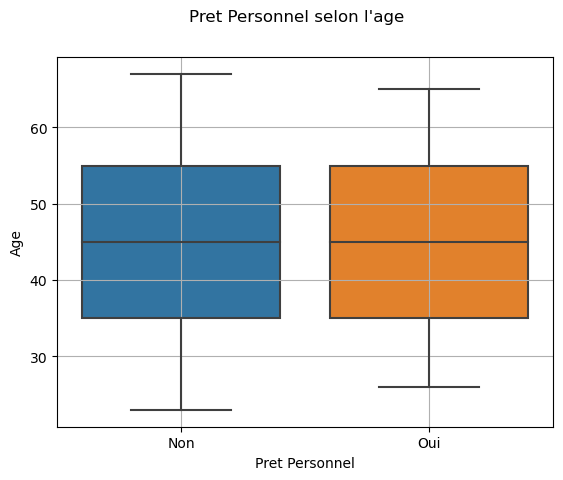

In [11]:
sns.boxplot(data=df, x="PP", y='Age')

# nom des axes
plt.xlabel("Pret Personnel")
plt.ylabel("Age")
# titre et sous-titre
plt.suptitle("Pret Personnel selon l'age")
# grille
plt.grid()

In [18]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [13]:
tab1=pd.crosstab(df['Age'], df["PP"])
tab1

PP,Non,Oui
Age,,
23,12,0
24,28,0
25,52,0
26,65,13
27,75,12
28,93,9
29,106,15
30,118,17
31,118,6


In [14]:
model = ols('Age ~ PP', data=df).fit()
anova_table1 = sm.stats.anova_lm(model, typ=2)
print(anova_table1)

                 sum_sq      df         F    PR(>F)
PP            29.882343     1.0  0.226932  0.633829
Residual  644177.562078  4892.0       NaN       NaN


In [15]:
def rap_cor(table_anova1,n) :
    VM=table_anova1['sum_sq'][0]
    MV=table_anova1['sum_sq'][1]
    rap_cor=round((VM/(VM+MV))**0.5,3)
    return rap_cor

In [16]:
n=df.shape[0]
rap_cor(anova_table1,n)

0.007

In [17]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

<Figure size 1200x600 with 0 Axes>

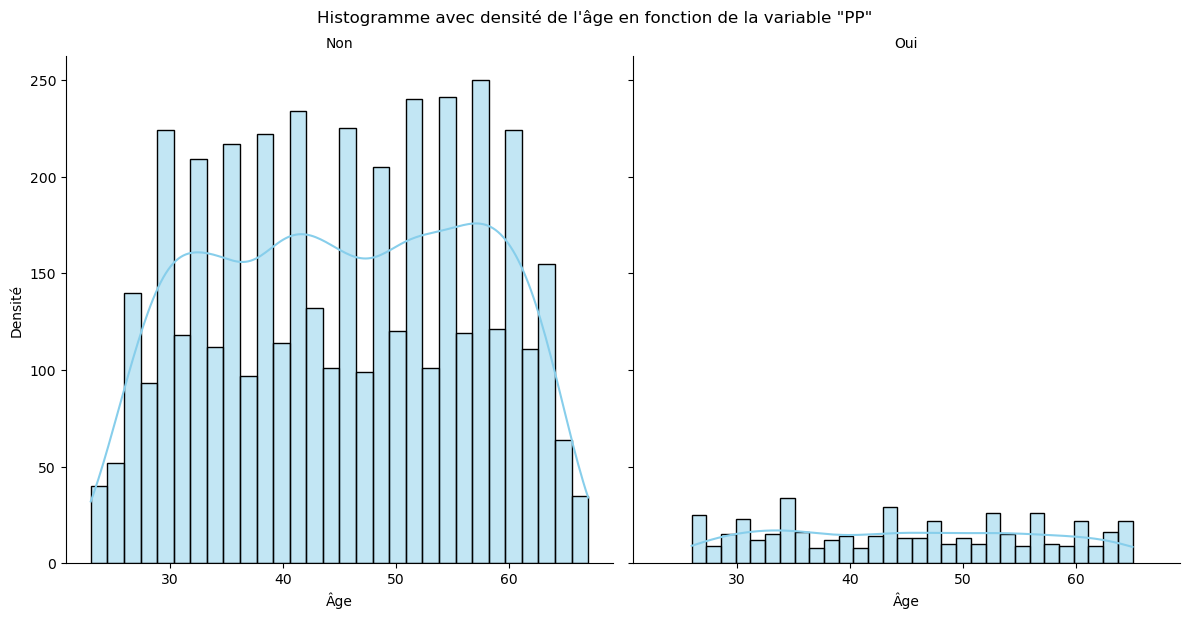

In [18]:
plt.figure(figsize=(12, 6))
g = sns.FacetGrid(df, col='PP', height=6, aspect=1)
g.map(sns.histplot, 'Age', kde=True, bins=30, color='skyblue', edgecolor='black')
g.set_axis_labels('Âge', 'Densité')
g.set_titles(col_template='{col_name}')
plt.suptitle('Histogramme avec densité de l\'âge en fonction de la variable "PP"', y=1.02)
plt.show() #La probabilité de ne pas avoir un pret personnel est supperieur a l'avoir quoi que se soit l'age

## Analyse bivarié entre les années d'expériences et l'obtention d'un pret personnel**

In [19]:
df_pp_exp=df.groupby("PP")["Exp"]

In [20]:
df_pp_exp.describe()

,count,mean,std,min,25%,50%,75%,max
PP,,,,,,,,
Non,4415.0,20.112344,11.464927,-3.0,10.0,20.0,30.0,43.0
Oui,479.0,19.870564,11.579629,0.0,9.0,20.0,30.0,41.0


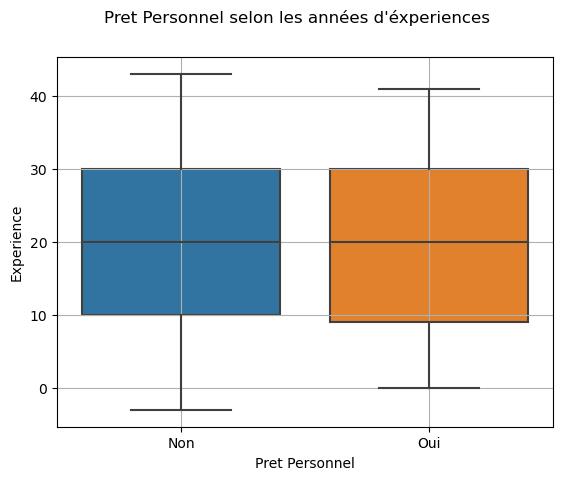

In [21]:
sns.boxplot(data=df, x="PP", y='Exp')

# nom des axes
plt.xlabel("Pret Personnel")
plt.ylabel("Experience")
# titre et sous-titre
plt.suptitle("Pret Personnel selon les années d'éxperiences")
# grille
plt.grid() #Les annees d'experiences n'ont aucun effet sur l'obtention d'un pret personnel

In [22]:
tab2=pd.crosstab(df['Exp'], df["PP"])
tab2

PP,Non,Oui
Exp,,
-3,4,0
-2,15,0
-1,33,0
0,59,7
1,65,8
2,76,9
3,108,17
4,103,9
5,129,14


In [23]:
model = ols('Exp ~ PP', data=df).fit()
anova_table2 = sm.stats.anova_lm(model, typ=2)
print(anova_table2)

                 sum_sq      df         F    PR(>F)
PP            25.260688     1.0  0.191801  0.661441
Residual  644290.252185  4892.0       NaN       NaN


In [24]:
def rap_cor(table_anova2,n) :
    VM=table_anova2['sum_sq'][0]
    MV=table_anova2['sum_sq'][1]
    rap_cor=round((VM/(VM+MV))**0.5,3)
    return rap_cor

In [25]:
n=df.shape[0]
rap_cor(anova_table2,n)

0.006

<Figure size 1200x600 with 0 Axes>

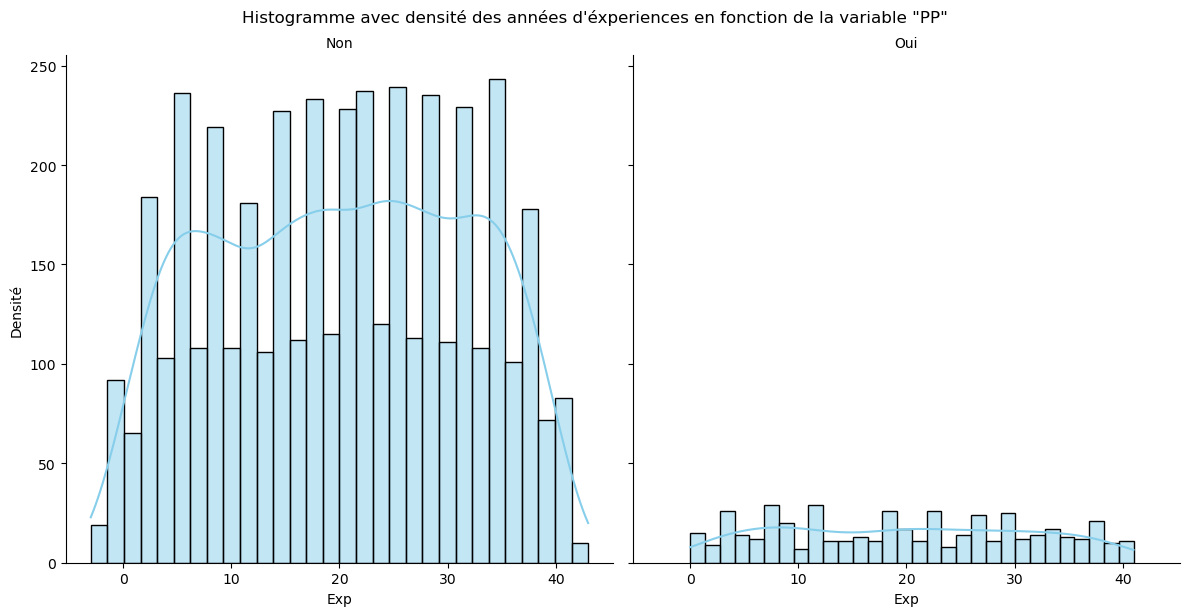

In [26]:
plt.figure(figsize=(12, 6))
g = sns.FacetGrid(df, col='PP', height=6, aspect=1)
g.map(sns.histplot, 'Exp', kde=True, bins=30, color='skyblue', edgecolor='black')
g.set_axis_labels('Exp', 'Densité')
g.set_titles(col_template='{col_name}')
plt.suptitle('Histogramme avec densité des années d\'éxperiences en fonction de la variable "PP"', y=1.02)
plt.show() #La probabilité de ne pas avoir un pret personnel est supperieur a l'avoir quoi que se soit les annees d'experiences

## Analyse bivarié entre le revenue monsuelle par milliers et l'obtention d'un pret personnel

In [27]:
df_pp_rmm=df.groupby("PP")["RMM"]

In [28]:
df_pp_rmm.describe()

,count,mean,std,min,25%,50%,75%,max
PP,,,,,,,,
Non,4415.0,65.985730,40.456626,8.0,35.0,59.0,84.0,224.0
Oui,479.0,144.647182,31.543335,60.0,122.0,142.0,172.0,203.0


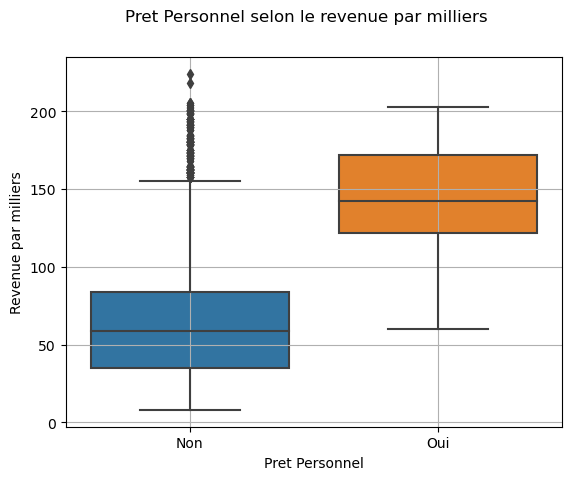

In [33]:
sns.boxplot(data=df, x="PP", y='RMM')

# nom des axes
plt.xlabel("Pret Personnel")
plt.ylabel("Revenue par milliers")
# titre et sous-titre
plt.suptitle("Pret Personnel selon le revenue par milliers")
# grille
plt.grid() #Nous remarquons sur le graphe que les individus ayant un revenue supperieur a 100.000, on plus de probabilité a avoir des pret personnel

In [30]:
tab3=pd.crosstab(df['RMM'], df["PP"])
tab3

PP,Non,Oui
RMM,,
8,23,0
9,23,0
10,22,0
11,25,0
12,29,0
...,...,...
203,1,1
204,3,0
205,2,0


In [31]:
model = ols('RMM ~ PP', data=df).fit()
anova_table3 = sm.stats.anova_lm(model, typ=2)
print(anova_table3)

                sum_sq      df            F         PR(>F)
PP        2.673783e+06     1.0  1698.683838  5.385563e-319
Residual  7.700165e+06  4892.0          NaN            NaN


In [32]:
def rap_cor(table_anova3,n) :
    VM=table_anova3['sum_sq'][0]
    MV=table_anova3['sum_sq'][1]
    rap_cor=round((VM/(VM+MV))**0.5,3)
    return rap_cor

In [33]:
n=df.shape[0]
rap_cor(anova_table3,n)

0.508

C:\Users\ASUS ROG Zephyrus S\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

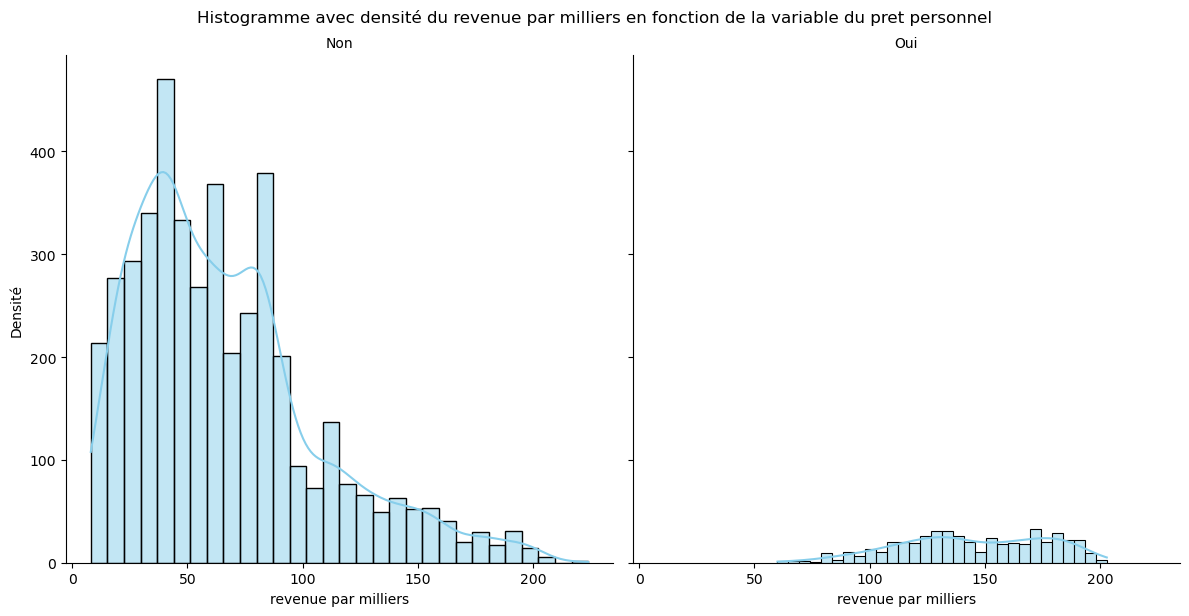

In [35]:
plt.figure(figsize=(12, 6))
g = sns.FacetGrid(df, col='PP', height=6, aspect=1)
g.map(sns.histplot, 'RMM', kde=True, bins=30, color='skyblue', edgecolor='black')
g.set_axis_labels('revenue par milliers', 'Densité')
g.set_titles(col_template='{col_name}')
plt.suptitle('Histogramme avec densité du revenue par milliers en fonction de la variable du pret personnel', y=1.02)
plt.show() #La probabilité de ne pas avoir un pret personnel est supperieur a l'avoir quoi que se soit l'age

In [35]:
# **Histogramme avec densité du revenue monsuelle par milliers en fonction de la variable du pret personnel**

Les différentes valeurs de l'axe x représentent les différentes plages Histogramme avec densité du revenue monsuelle par milliers, l'axe y représente les densités et la courbe bleu foncé représente la courbe de densité.

**Histogramme a gauche**

Cet histogramme représente la distribution des revenue mensuelle par millier selon la modalié 'Non' du pret personnel"." Sa forme de distribution est une asymétrie à droite, le centre de distribution se situe entre la cinquième et sixième barres en se basant sur la moyenne et la médiane, plus les individus obtient un salaire supperieur plus ils sont tendances a avoir des pret personnel, d'ou la forme fine a droite de l'histogramme meme avec la presence de 4 pic.

**Histogramme a droite**

Cet histogramme représente la distribution des revenue mensuelle par millier selon la modalié 'Oui' du pret personnel.Sa forme de distribution est une légère asymétrie à gauche, le centre de distribution se situe au milieu en se basant sur la moyenne et la médiane, avec deux pics. Il a une forme fine a gauche se qui prouve que les individus ayant un salaire inferieur ont moins de probabilités a avoir des pret personnel.

SyntaxError: invalid syntax (3336906364.py, line 3)

## Analyse bivarié entre le nombre d'individus en famille et l'obtention d'un pret personnel

In [9]:
df_pp_f=df.groupby("PP")["F"]

In [10]:
df_pp_f.describe()

,count,mean,std,min,25%,50%,75%,max
PP,,,,,,,,
Non,4415.0,2.382559,1.150723,1.0,1.0,2.0,3.0,4.0
Oui,479.0,2.615866,1.114116,1.0,2.0,3.0,4.0,4.0


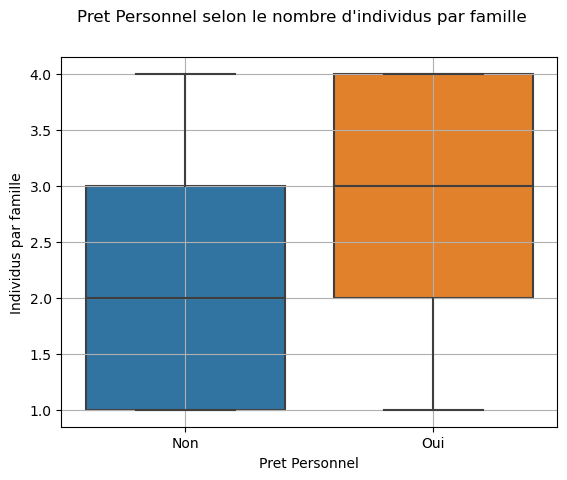

In [36]:
sns.boxplot(data=df, x="PP", y='F')

# nom des axes
plt.xlabel("Pret Personnel")
plt.ylabel("Individus par famille")
# titre et sous-titre
plt.suptitle("Pret Personnel selon le nombre d'individus par famille")
# grille
plt.grid() #L'individu faisant partie d'une grande famille a plus de probabiliter d'avoir un pret personnel

In [37]:
tab4=pd.crosstab(df['F'], df["PP"])
tab4

PP,Non,Oui
F,,
1,1330,106
2,1137,106
3,877,133
4,1071,134


In [38]:
model = ols('F ~ PP', data=df).fit()
anova_table4 = sm.stats.anova_lm(model, typ=2)
print(anova_table4)

               sum_sq      df          F    PR(>F)
PP          23.521095     1.0  17.872327  0.000024
Residual  6438.176494  4892.0        NaN       NaN


In [39]:
def rap_cor(table_anova4,n) :
    VM=table_anova4['sum_sq'][0]
    MV=table_anova4['sum_sq'][1]
    rap_cor=round((VM/(VM+MV))**0.5,3)
    return rap_cor

In [40]:
n=df.shape[0]
rap_cor(anova_table4,n)

0.06

C:\Users\ASUS ROG Zephyrus S\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

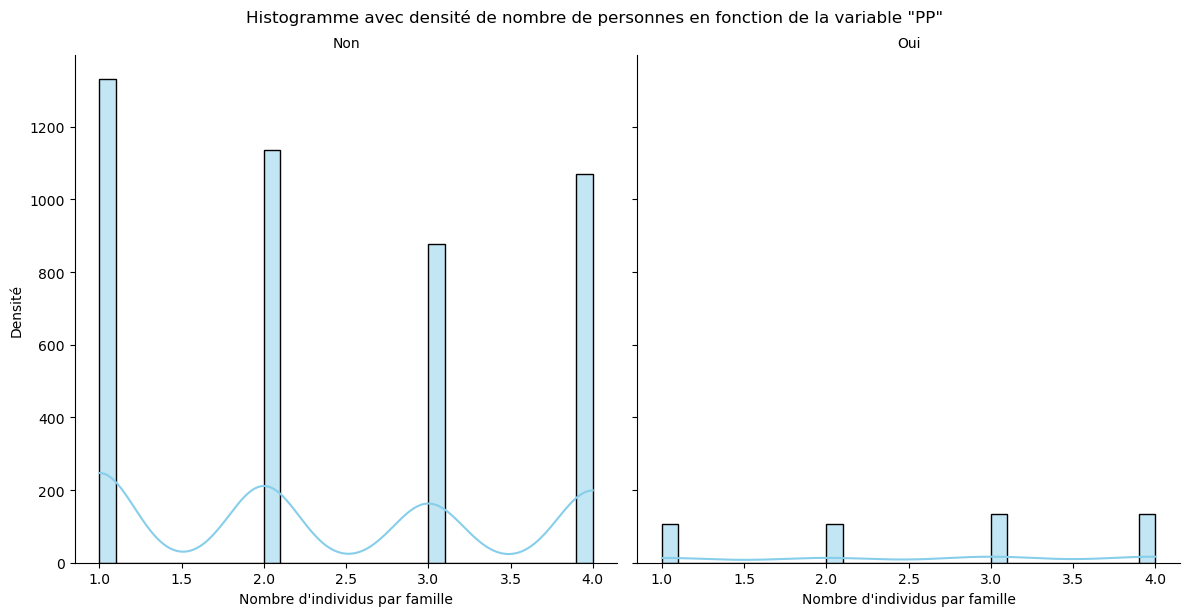

In [24]:
plt.figure(figsize=(12, 6))
g = sns.FacetGrid(df, col='PP', height=6, aspect=1)
g.map(sns.histplot, 'F', kde=True, bins=30, color='skyblue', edgecolor='black')
g.set_axis_labels('Nombre d\'individus par famille', 'Densité')
g.set_titles(col_template='{col_name}')
plt.suptitle('Histogramme avec densité de nombre de personnes en fonction de la variable "PP"', y=1.02)
plt.show() #La probabilité de ne pas avoir un pret personnel est supperieur a l'avoir quoi que se soit l'age

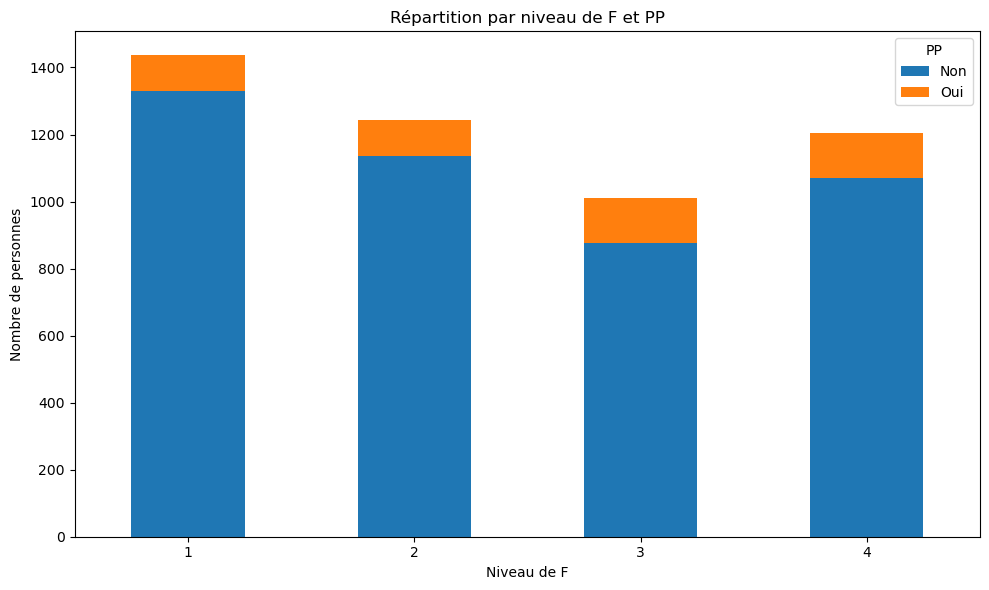

In [29]:
data = {
    'PP': ['Non', 'Non', 'Non', 'Non', 'Oui', 'Oui', 'Oui', 'Oui'],
    'F': [1, 2, 3, 4, 1, 2, 3, 4],
    'Count': [1330, 1137, 877, 1071, 106, 106, 133, 134]
}

# Création du DataFrame à partir des résultats de la table croisée
df = pd.DataFrame(data)

# Création du graphe de barres empilées
pivot_df = df.pivot(index='F', columns='PP', values='Count')
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Ajout de titres et de légendes
plt.xlabel('Niveau de F')
plt.ylabel('Nombre de personnes')
plt.title('Répartition par niveau de F et PP')
plt.xticks(rotation=0)
plt.legend(title='PP')

# Affichage du graphe
plt.tight_layout()
plt.show()

In [21]:
# Tableau croisé dynamique entre 'Prêt Personnel' et 'Education'
tableau_croise = pd.crosstab(df['PP'], df['F'])

# Afficher le tableau croisé
print("Tableau croisé dynamique entre 'Prêt Personnel' et 'Education':\n", tableau_croise)


Tableau croisé dynamique entre 'Prêt Personnel' et 'Education':
 F       1     2    3     4
PP                        
Non  1330  1137  877  1071
Oui   106   106  133   134


## Analyse bivarié entre les depenses mensuelles et l'obtention d'un pret personnel

In [42]:
df_pp_dm=df.groupby("PP")["DM"]

In [43]:
df_pp_dm.describe()

,count,mean,std,min,25%,50%,75%,max
PP,,,,,,,,
Non,4415.0,1770.129105,1563.065215,100.0,700.0,1500.0,2300.0,8800.0
Oui,479.0,3913.507307,2092.247049,100.0,2600.0,3800.0,5365.0,10000.0


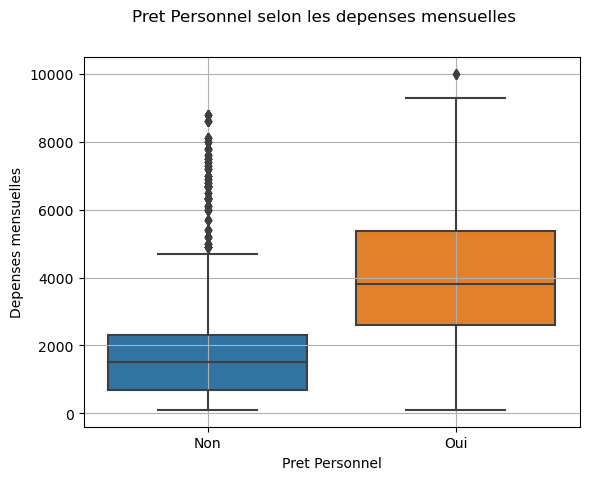

In [44]:
sns.boxplot(data=df, x="PP", y='DM')

# nom des axes
plt.xlabel("Pret Personnel")
plt.ylabel("Depenses mensuelles")
# titre et sous-titre
plt.suptitle("Pret Personnel selon les depenses mensuelles")
# grille
plt.grid()

In [45]:
tab5=pd.crosstab(df['DM'], df["PP"])
tab5

PP,Non,Oui
DM,,
100,181,2
200,196,8
300,235,6
400,175,4
500,155,8
...,...,...
8800,8,1
8900,0,1
9000,0,2


In [46]:
model = ols('DM ~ PP', data=df).fit()
anova_table5 = sm.stats.anova_lm(model, typ=2)
print(anova_table5)

                sum_sq      df          F         PR(>F)
PP        1.985180e+09     1.0  754.19703  1.521745e-154
Residual  1.287661e+10  4892.0        NaN            NaN


In [47]:
def rap_cor(table_anova5,n) :
    VM=table_anova5['sum_sq'][0]
    MV=table_anova5['sum_sq'][1]
    rap_cor=round((VM/(VM+MV))**0.5,3)
    return rap_cor

In [48]:
n=df.shape[0]
rap_cor(anova_table5,n)

0.365

<Figure size 1200x600 with 0 Axes>

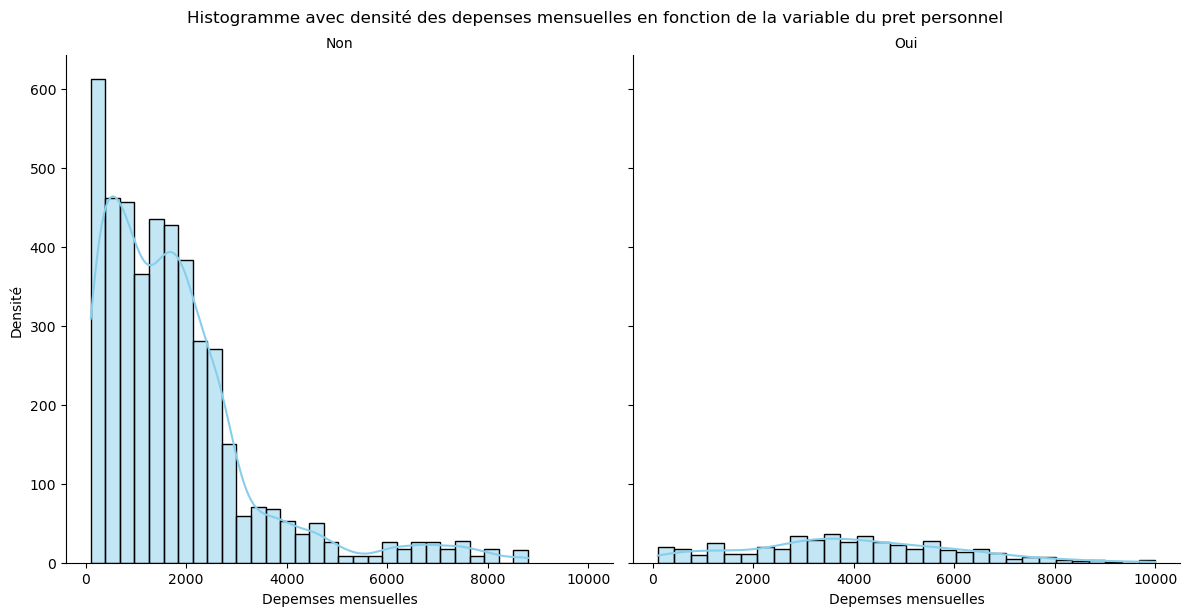

In [49]:
plt.figure(figsize=(12, 6))
g = sns.FacetGrid(df, col='PP', height=6, aspect=1)
g.map(sns.histplot, 'DM', kde=True, bins=30, color='skyblue', edgecolor='black')
g.set_axis_labels('Depemses mensuelles', 'Densité')
g.set_titles(col_template='{col_name}')
plt.suptitle('Histogramme avec densité des depenses mensuelles en fonction de la variable du pret personnel', y=1.02)
plt.show() #La probabilité de ne pas avoir un pret personnel est supperieur a l'avoir quoi que se soit les depenses mensuelles

## Analyse bivarié entre le niveau d'éducation et l'obtention d'un pret personnel

In [50]:
df_pp_edu=df.groupby("PP")["Educ"]

In [51]:
df_pp_edu.describe()

,count,mean,std,min,25%,50%,75%,max
PP,,,,,,,,
Non,4415.0,1.847792,0.839352,1.0,1.0,2.0,3.0,3.0
Oui,479.0,2.233820,0.754085,1.0,2.0,2.0,3.0,3.0


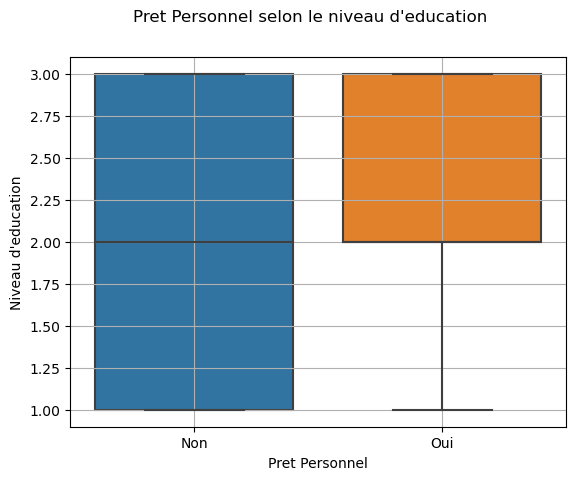

In [52]:
sns.boxplot(data=df, x="PP", y='Educ')

# nom des axes
plt.xlabel("Pret Personnel")
plt.ylabel("Niveau d'education")
# titre et sous-titre
plt.suptitle("Pret Personnel selon le niveau d'education")
# grille
plt.grid()

In [53]:
tab6=pd.crosstab(df['Educ'], df["PP"])
tab6

PP,Non,Oui
Educ,,
1,1942,93
2,1203,181
3,1270,205


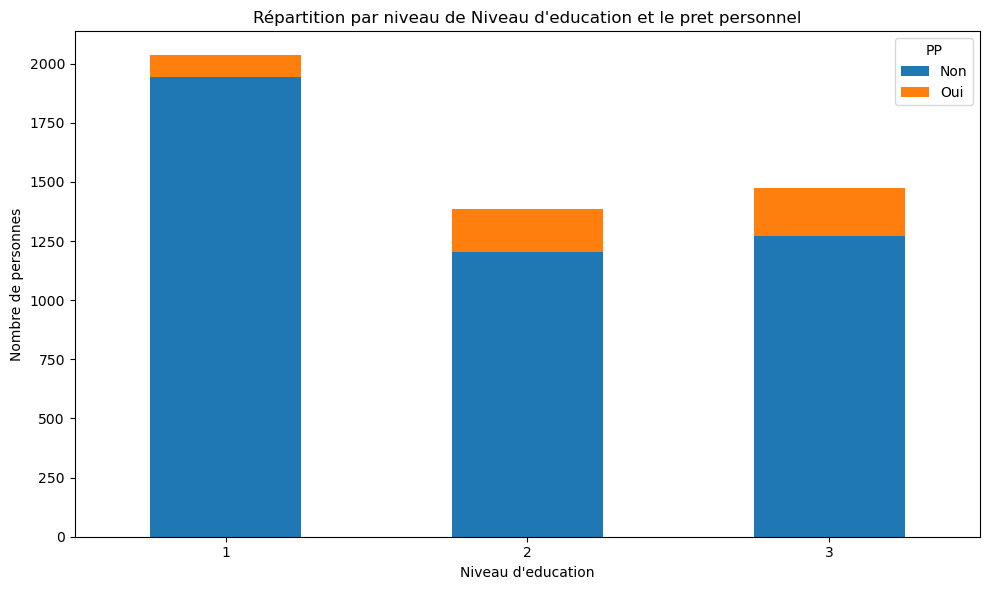

In [45]:
data = {
    'PP': ['Non', 'Non', 'Non', 'Oui', 'Oui', 'Oui'],
    'F': [1, 2, 3, 1, 2, 3],
    'Count': [1942, 1203, 1270, 93, 181, 205]
}

# Création du DataFrame à partir des résultats de la table croisée
df = pd.DataFrame(data)

# Création du graphe de barres empilées
pivot_df = df.pivot(index='F', columns='PP', values='Count')
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Ajout de titres et de légendes
plt.xlabel('Niveau d\'education')
plt.ylabel('Nombre de personnes')
plt.title('Répartition par niveau de Niveau d\'education et le pret personnel')
plt.xticks(rotation=0)
plt.legend(title='PP')

# Affichage du graphe
plt.tight_layout()
plt.show()

In [54]:
model = ols('Educ ~ PP', data=df).fit()
anova_table6 = sm.stats.anova_lm(model, typ=2)
print(anova_table6)

               sum_sq      df          F        PR(>F)
PP          64.393460     1.0  93.156939  7.555922e-22
Residual  3381.528077  4892.0        NaN           NaN


In [55]:
def rap_cor(table_anova6,n) :
    VM=table_anova6['sum_sq'][0]
    MV=table_anova6['sum_sq'][1]
    rap_cor=round((VM/(VM+MV))**0.5,3)
    return rap_cor

In [56]:
n=df.shape[0]
rap_cor(anova_table6,n)

0.137

<Figure size 1200x600 with 0 Axes>

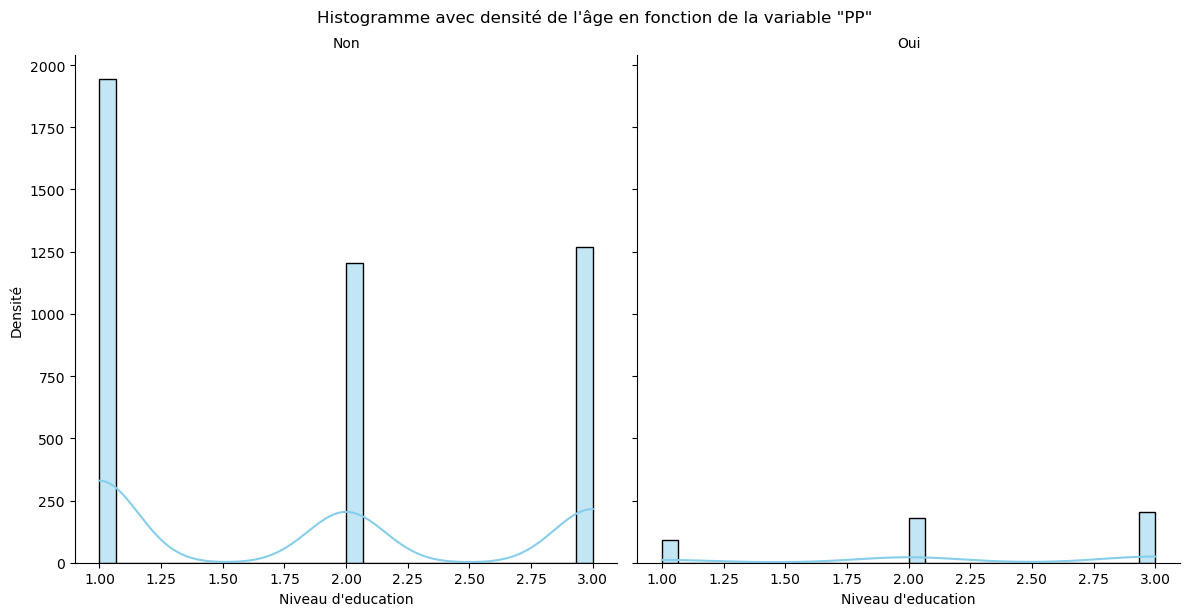

In [57]:
plt.figure(figsize=(12, 6))
g = sns.FacetGrid(df, col='PP', height=6, aspect=1)
g.map(sns.histplot, 'Educ', kde=True, bins=30, color='skyblue', edgecolor='black')
g.set_axis_labels('Niveau d\'education', 'Densité')
g.set_titles(col_template='{col_name}')
plt.suptitle('Histogramme avec densité de l\'âge en fonction de la variable "PP"', y=1.02)
plt.show() 

## Analyse bivarié entre l'acquisition d'un compte epargne logement et l'obtention d'un pret personnel

In [43]:
tab7=pd.crosstab(df['CEL'], df["PP"])
tab7

PP,Non,Oui
CEL,,
Non,4255,339
Oui,160,140


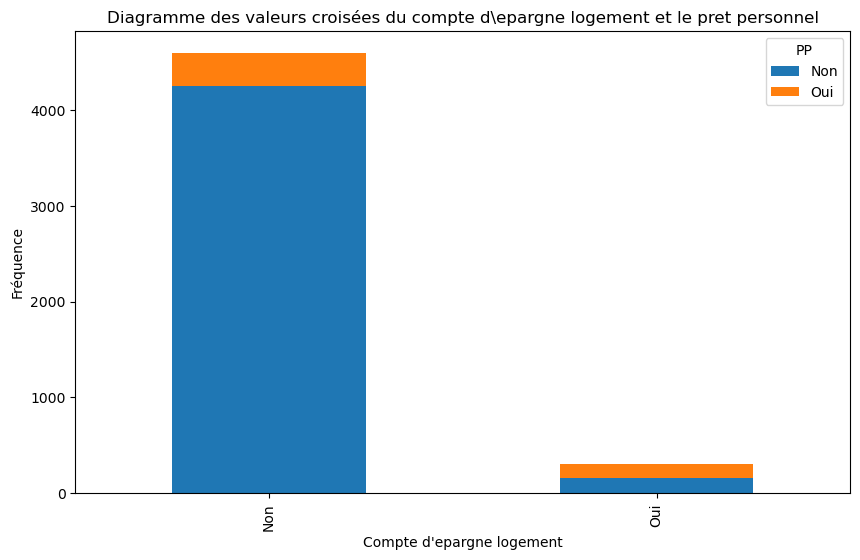

In [46]:
# Affichage du diagramme à partir de la table croisée tab7
tab7.plot(kind='bar', stacked=True, figsize=(10, 6))

# Ajout de titres et de légendes
plt.title('Diagramme des valeurs croisées du compte d\epargne logement et le pret personnel')
plt.xlabel('Compte d\'epargne logement')  # Nom de l'axe des x
plt.ylabel('Fréquence')  # Nom de l'axe des y
plt.legend(title='PP')  # Légende pour les couleurs

# Affichage du diagramme
plt.show()

In [13]:
df_pp_edu=df.groupby("PP")[""]

In [14]:
df_pp_cel.describe()

,count,unique,top,freq
PP,,,,
Non,4415,2,Non,4255
Oui,479,2,Non,339


In [59]:
chi2_contingency(tab7)

Chi2ContingencyResult(statistic=487.8473806290599, pvalue=4.189861373671145e-108, dof=1, expected_freq=array([[4144.36248468,  449.63751532],
       [ 270.63751532,   29.36248468]]))

In [60]:
fisher_exact(tab7)[1]

1.6905763480541124e-67